# Visualizing state spaces via dimensionality reduction

In [1]:
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

np.set_printoptions(linewidth=300, suppress=True)

from src.experiments.util_experiments import *
from src.oom import DiscreteValuedOOM, ContinuousValuedOOM

### PCA

In [24]:
from matplotlib.collections import LineCollection

def plot_pca_results(x_pca, y_pca, fig, ax, title, scale='auto'):
    ax.set_title(title)
    points = np.array([x_pca, y_pca]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis = 1)
    cols = np.linspace(0, 1, len(x_pca))

    cmap = sns.color_palette("flare", as_cmap=True)
    lc = LineCollection(segments, cmap = cmap, alpha = 0.5)
    lc.set_array(cols)
    lc.set_linewidth(0.15)
    line = ax.add_collection(lc)

    if scale == 'auto':
        ax.autoscale()
    else:
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    fig.colorbar(line, ax = ax)

def make_plot(oom, fig, ax, title):
    gen = oom.generate(10000, reduced = False)
    pvecs = np.vstack([pvec for pvec in gen.p_vec_list if not np.any(np.isnan(pvec))])
    
    pvs_embeds_pca = PCA(n_components = 2).fit_transform(pvecs)
    
    x_pca = pvs_embeds_pca[:,0]
    y_pca = pvs_embeds_pca[:,1]
    
    plot_pca_results(x_pca, y_pca, fig, ax, title, scale=0)

def plot_mfs(cvoom, fig, ax, title):
    ax.set_title(title)
    ax.set_xlim([-5, 5])
    
    x = np.linspace(-5, 5, 10000)
    for obs, mf in zip(cvoom.observables, cvoom.membership_fns):
        ax.plot(x, mf.pdf(x), label=obs.uid)
    ax.legend()

    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

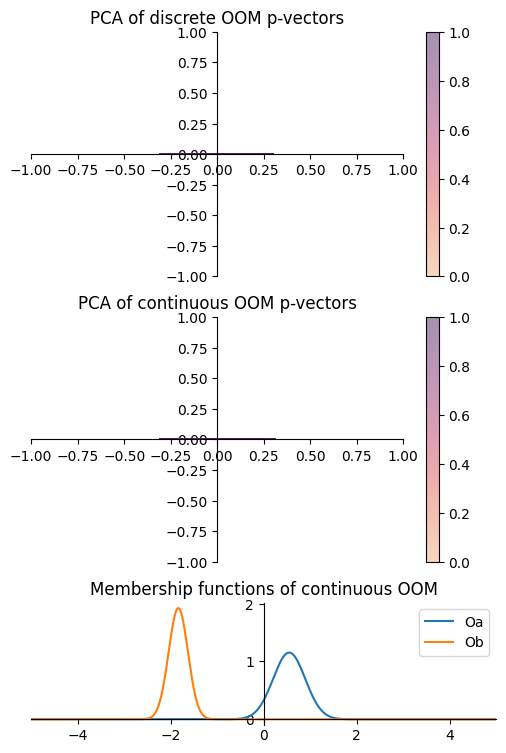

In [41]:
fig, axs = plt.subplots(3, 1, figsize=(6, 9), height_ratios=[1, 1, 0.5])
axs = axs.flatten()

n = 2
d = 10
density = 0.2

oom_disc = make_source(dimension = d, alphabet_size = n, density = density, seed = None)
mfs = get_gaussian(seed = 0)(n)
oom_cont = ContinuousValuedOOM.from_discrete_valued_oom(oom_disc, mfs)

make_plot(oom_disc, fig, axs[0], "PCA of discrete OOM p-vectors")
make_plot(oom_cont, fig, axs[1], "PCA of continuous OOM p-vectors")
plot_mfs(oom_cont, fig, axs[2], "Membership functions of continuous OOM")